<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Bayesian Statistics With Baseball Data: Priors and Posteriors

_Authors: Kiefer Katovich (SF), Justin Pounders_

---

Let’s review the general set up for Bayesian modeling. We have:

### $$P\left(\text{model}|\text{data}\right) = \frac{P\left(\text{data}|\text{model}\right)P\left(\text{model}\right)}{P(\text{data})} $$

This is the diachronic interpretation of Bayes' theorem.

It can also be written as:

### $$\text{posterior} \propto \text{likelihood} \times \text{prior}$$

Here, the posterior is an update of our prior belief given the data observed.

In [21]:
# Imports go here.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import beta

## Bayesian Analysis of Batting Averages

---

Load in the simple batting average data for players below. There are just four fields in the data set: the player's name, their times at bat, their hits, and their batting average.

> *Note: [This section of the lab is a partial replication of this exercise in R, if you're interested](https://www.r-bloggers.com/understanding-empirical-bayes-estimation-using-baseball-statistics/). Here, we took out the empirical Bayes section because it's not technically a correct interpretation of Bayesian statistical analysis.*

In [22]:
# A:

df = pd.read_csv('./data/career_hits.csv')
df

,name,hits,at_bat,average
0,Hank Aaron,3771,12364,0.304998
1,Tommie Aaron,216,944,0.228814
2,Andy Abad,2,21,0.095238
3,John Abadie,11,49,0.224490
4,Ed Abbaticchio,772,3044,0.253614
...,...,...,...,...
9424,Mike Zunino,185,961,0.192508
9425,Bob Zupcic,199,795,0.250314
9426,Frank Zupo,3,18,0.166667
9427,Paul Zuvella,109,491,0.221996


### 1) Find the top and bottom three hitters according to their average.

What is wrong with using the average to find the three best and worst hitters?

In [23]:
# A:

print(df.sort_values('average', ascending=False).head(3))
print(df.sort_values('average', ascending=True).head(3))

               name  hits  at_bat  average
5853   John Mohardt     1       1      1.0
9303      Al Wright     1       1      1.0
359   Jeff Banister     1       1      1.0
                name  hits  at_bat  average
1494  Larry Ciaffone     0       5      0.0
7303      Jay Rogers     0       8      0.0
2552     Ferd Eunick     0       2      0.0


### 2) Set up a prior distribution to represent our belief about batting average.

[After doing a quick search online](https://www.google.com/search?q=average+batting+average+for+players+mlb&oq=average+batting+average+for+players+mlb&aqs=chrome..69i57j0.7373j0j4&sourceid=chrome&ie=UTF-8), it looks like the overall batting average for MLB baseball players is around 0.260.

Let's make it simple and say that our prior belief is that, out of 100 at-bats, we’ve seen 26 hits. Set up a beta distribution with `alpha=26` and `beta=74`. Plot it with the function from above.

**Take a look at the beta distribution's mean and variance to justify to yourself that these hyperparamters make sense!**

This is our distribution of beliefs on the batting average (probability of hitting while at bat) for MLB players.

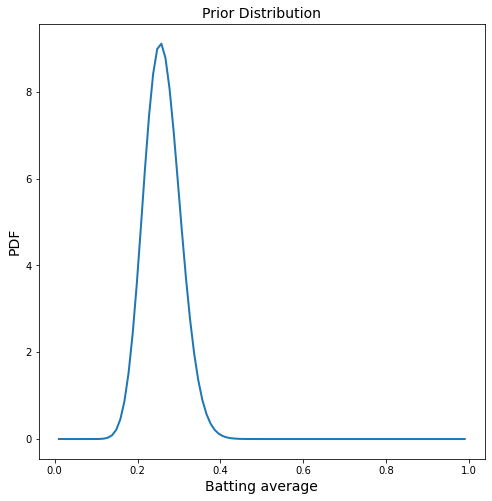

In [24]:
# A:

# Setup alph anf beta prior in accordance with above:
alpha_prior = 26
beta_prior = 74

# Beta dist between 0 and 1:
p = np.linspace(0.01, 0.99, 100)
prior = beta(alpha_prior, beta_prior)

# Plot parameters:
plt.figure(figsize=(8,8))
plt.plot(p, prior.pdf(p), lw=2)
plt.title('Prior Distribution', fontsize=14)

# Label:
plt.xlabel('Batting average', fontsize=14)
plt.ylabel('PDF', fontsize=14)

#Plot:
plt.show();

# Code adapted from 10.02 Solutions

### 3) Calculate the maximum a posteriori (MAP) estimate of players' batting averages.

The maximum a posteriori (MAP) estimate is the mode of a posterior distribution for a statistical parameter.

In our case, the MAP estimate for our players' batting averages will be the mode of the posterior beta distribution we get from updating our prior distribution with their at bats and hits.

---

> *Note: For an additional overview of the math behind updating the beta distribution posterior and conjugate priors, ([check out this website](https://alexanderetz.com/2015/07/25/understanding-bayes-updating-priors-via-the-likelihood/)).*

We need to update our beta distribution’s prior belief about batting averages with a player's at-bat and hit information to get a _new_ beta posterior distribution for that player's batting average. 

Luckily, with the beta distribution, the update is just a matter of adding in our new observations to the alpha and beta parameters, where alpha is the number of hits and beta is the number of misses/strikes:

    observed_hits = n_hits
    observed_misses = n_misses
    beta_prior = Beta(prior_hits+1, prior_misses+1)
    beta_posterior = Beta(prior_hits + n_nits + 1, prior_misses + n_misses + 1)
    
> **Note:** This process will also be useful in the context of A/B testing, which we’ll look at later on.

For each player, update the prior to the posterior distribution and calculate the mode of the distribution. The mode of a beta distribution is conveniently defined as:

### $$ \frac{\alpha - 1}{\alpha + \beta -2} $$

Which means we don't even need to use SciPy's beta distribution function. Just calculate the new alpha and beta for each player's posterior beta distribution and plug them into the formula above to get the MAP estimate of batting the average.

In [25]:
# A:

# Define function to update prior:

def getmap(row):
    alpha_posterior = row.hits + alpha_prior
    beta_posterior = row.at_bat - row.hits + beta_prior
    return (alpha_posterior-1)/(alpha_posterior+beta_posterior-2)

# Code for function adapted from 10.02 Solutions

In [26]:
# Apply function to new column 'map':

df['map'] = df.apply(getmap, axis=1)

### 4) Look up the top and bottom batters according to the MAP estimate.

In [27]:
# A:

print(df.sort_values('map', ascending=False).head())
print(df.sort_values('map', ascending=True).head())

                      name  hits  at_bat   average       map
3938        Rogers Hornsby  2930    8173  0.358497  0.357272
4118  Shoeless Joe Jackson  1772    4981  0.355752  0.353810
2109          Ed Delahanty  2596    7505  0.345903  0.344732
3475        Billy Hamilton  2158    6268  0.344288  0.342915
3663        Harry Heilmann  2660    7787  0.341595  0.340520
                    name  hits  at_bat   average       map
4322         Mike Jordan    12     125  0.096000  0.165919
4031      John Humphries    52     364  0.142857  0.166667
2987        Ed Gastfield     6      88  0.068182  0.166667
3113        Buck Gladmon    56     380  0.147368  0.169456
232   Charlie Armbruster    53     355  0.149296  0.172185


### 5) Plot the MLE batting average against the MAP batting average.

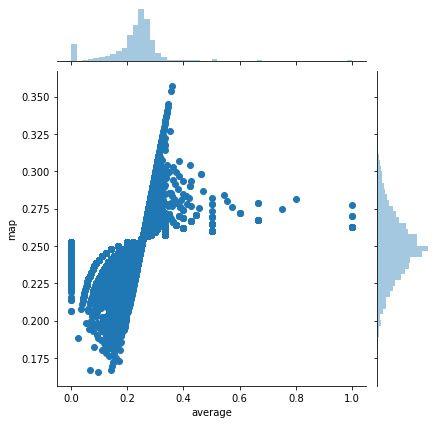

In [29]:
# A:

sns.jointplot('average', 'map', data=df)